In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load the dataset

In [6]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target

In [12]:
# Basic Analysis

## Dataset Info

In [13]:
print("\n=== Basic Dataset Information ===")
print(df.info())

print("\n=== First 5 rows of the dataset ===")
print(df.head())

print("\n=== Dataset shape ===")
print("Number of rows and columns:", df.shape)

print("\n=== Column names ===")
print("Columns:", df.columns.tolist())

print("\n=== Basic statistics ===")
print(df.describe())

print("\n=== Check for missing values ===")
print(df.isnull().sum())


=== Basic Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

=== First 5 rows of the dataset ===
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0 

## Correlation Matrix

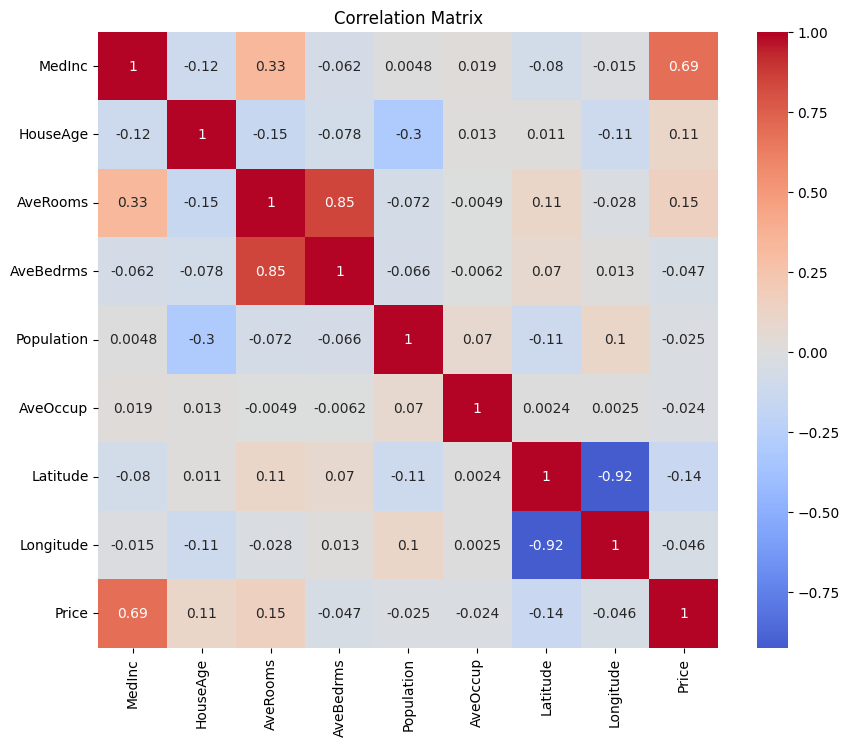

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Distribution of the target var (Price)

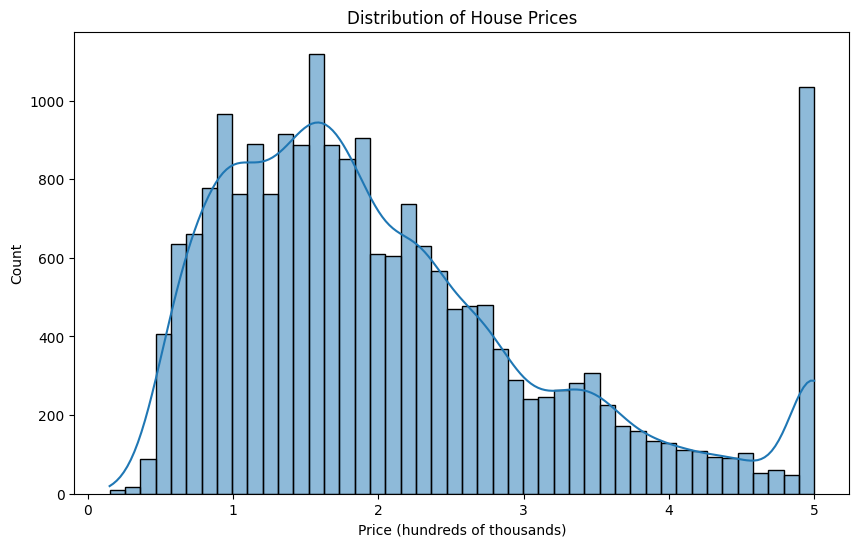

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde = True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (hundreds of thousands)')
plt.show()


## Box plots of the features

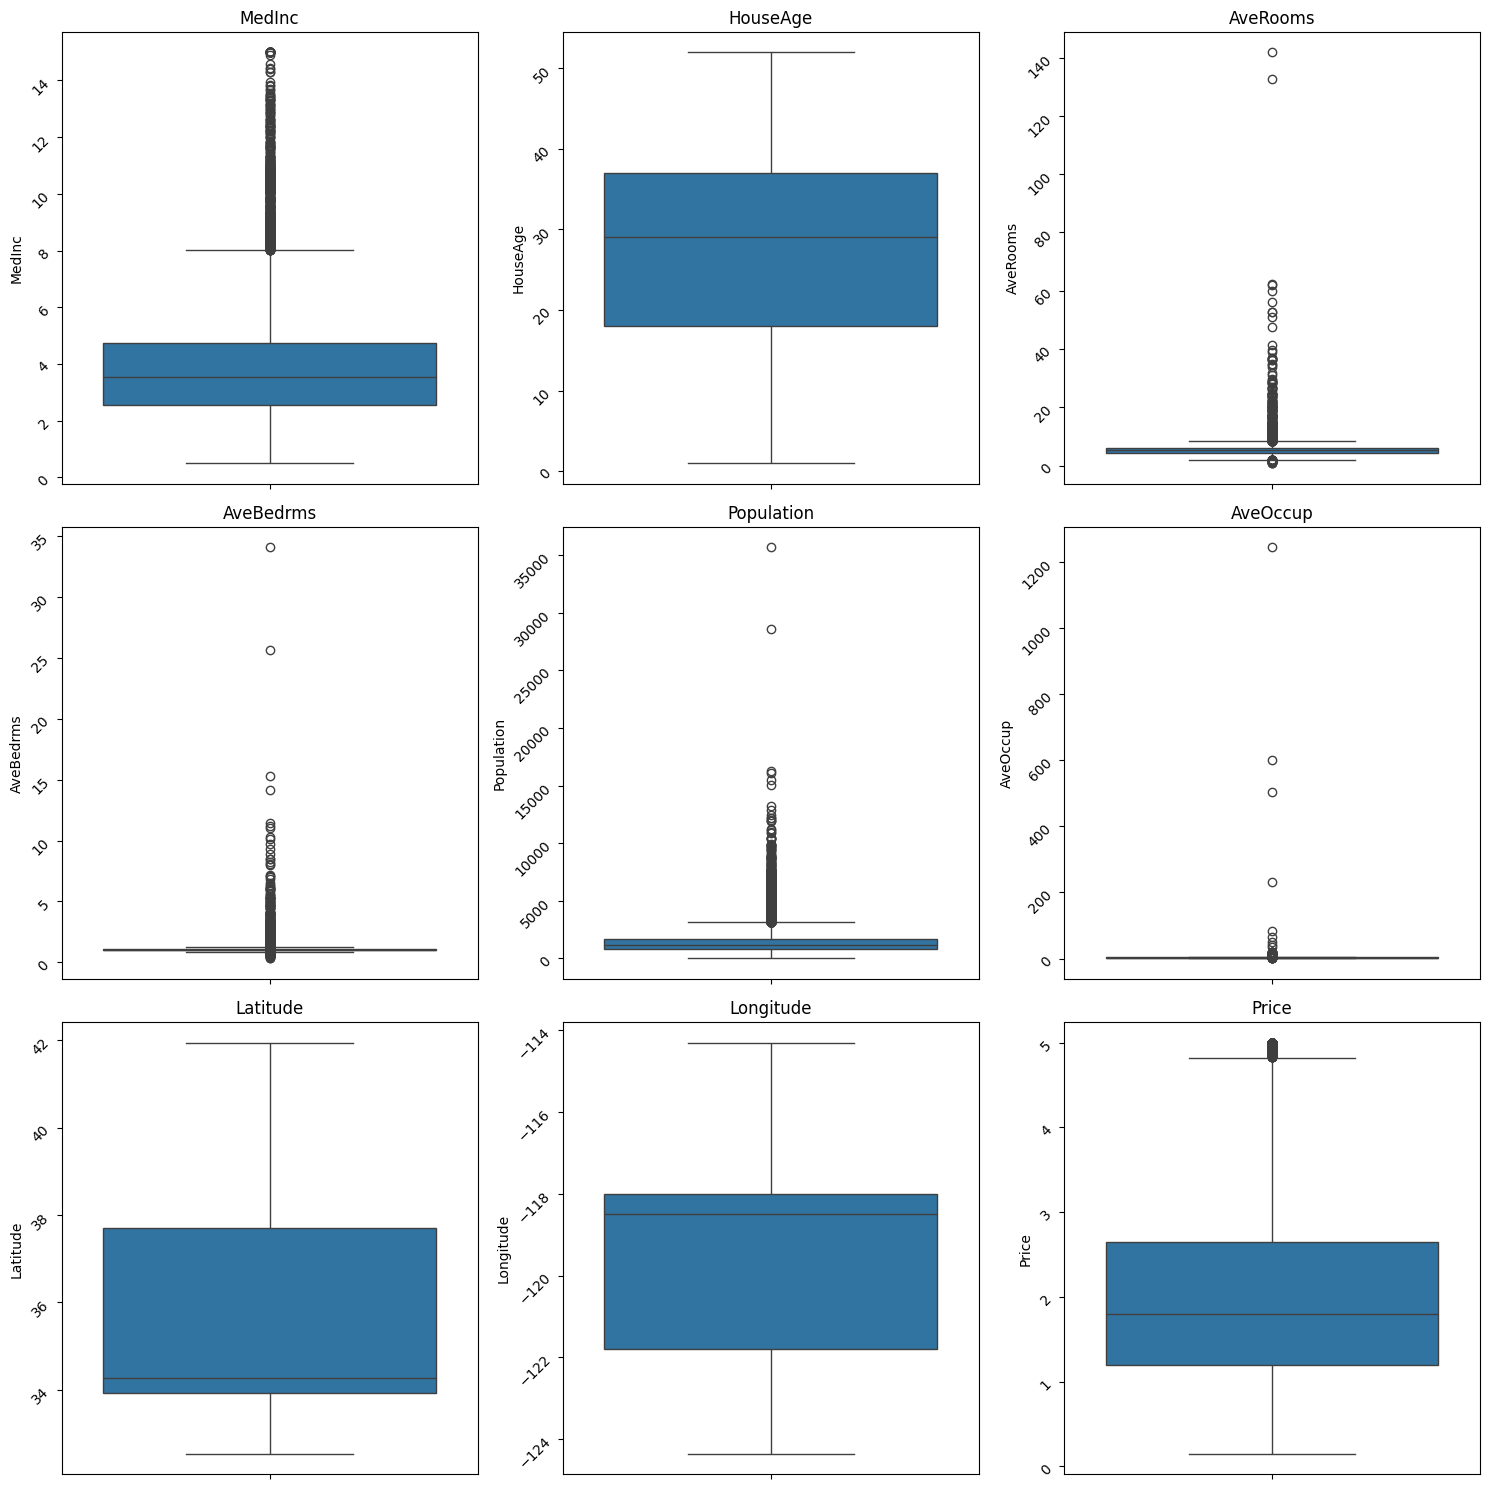

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel() # Flatten the 2D array of axes

for idx, column in enumerate(df.columns):
    sns.boxplot(data=df[column], ax=axes[idx])
    axes[idx].set_title(column)
    axes[idx].tick_params(rotation=45)

plt.tight_layout()
plt.show()

# Use median income as a feature

In [14]:
X = df['MedInc']
y = df['Price']